In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
steels_train = '~/Projects/machine-learning/data/steels_train.csv'

steels_train = pd.read_csv(steels_train, sep = ",", engine='python')

In [3]:
steels_train.head()

,c,cr,fe,al,ti,yield strength
0,0.046512,0.000000,0.000000,0.078212,0.620,0.934326
1,0.023256,0.000000,0.354167,0.508380,0.280,0.381680
2,0.000000,0.817038,0.341667,0.050279,0.196,0.228995
3,0.093023,0.707261,0.575000,0.446927,0.012,0.199083
4,0.023256,0.578045,0.287500,0.011173,0.000,0.319263


In [4]:
steels_train.shape

(174, 6)

In [5]:
steels_train.describe()

,c,cr,fe,al,ti,yield strength
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,0.221866,0.459269,0.446408,0.136069,0.126506,0.277403
std,0.248991,0.311240,0.210586,0.197435,0.224213,0.194965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.004587
25%,0.023256,0.176672,0.270833,0.011173,0.000000,0.153068
50%,0.069767,0.556604,0.402083,0.027933,0.012000,0.228363
75%,0.436047,0.714694,0.614583,0.194134,0.092000,0.364115
max,0.930233,0.971412,1.000000,1.000000,1.000000,1.000000


In [6]:
# Dividing the training data set into X and Y
y_train = steels_train.pop('yield strength')
X_train = steels_train

In [7]:
# Import validation data
steels_val = '~/Projects/machine-learning/data/steels_val.csv'

steels_val = pd.read_csv(steels_val, sep = ",", engine='python')

In [8]:
# Import validation data
steels_val = '~/Projects/machine-learning/data/steels_val.csv'

steels_val = pd.read_csv(steels_val, sep = ",", engine='python')

# Dividing the validation data set into X and Y
y_val = steels_val.pop('yield strength')
X_val = steels_val

In [9]:
# Build a linear SVM model

from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_val)

Text(0.5, 0, 'Errors')

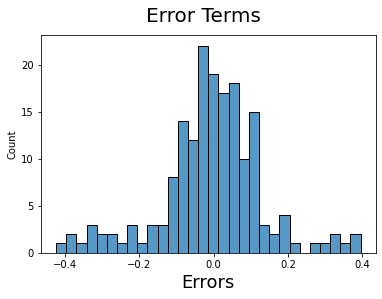

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 
y_train_yield_strength = regressor.predict(X_train)
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_yield_strength), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [11]:
# mean squared error

from sklearn.metrics import mean_squared_error

y_pred = regressor.predict(X_train)

mean_squared_error(y_train, y_pred)

0.018738038595466917

In [12]:
regressor.score(X_train, y_train)

0.5041907600110688

In [13]:
# mean squared error

from sklearn.metrics import mean_squared_error

y_pred = regressor.predict(X_val)

mean_squared_error(y_val, y_pred)

0.02141137239704782

In [14]:
regressor.score(X_val, y_val)

0.5596169784104239

In [15]:
# Import test data
steels_test = '~/Projects/machine-learning/data/steels_test.csv'

steels_test = pd.read_csv(steels_test, sep = ",", engine='python')

# Dividing the validation data set into X and Y
y_test = steels_test.pop('yield strength')
X_test = steels_test

In [16]:
regressor.score(X_test, y_test)

0.4357048027704632

In [17]:
# mean squared error

from sklearn.metrics import mean_squared_error

y_pred_test = regressor.predict(X_test)

mean_squared_error(y_test, y_pred_test)

0.02043314625421969

In [18]:
from sklearn import metrics

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred_test) * 1000, 2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred_test) * 1000, 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)) * 1000, 2))

Mean Absolute Error: 100.72
Mean Squared Error: 20.43
Root Mean Squared Error: 142.94
